### Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

``salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]``  
``scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]``

Возьмём в качестве признака значение ``salary``, а в качестве целевой переменной - ``scoring``.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

#### Решение

In [0]:
import numpy as np

In [0]:
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

x1 = np.array(salary, dtype=np.float64)
y1 = np.array(scoring, dtype=np.float64)

Формулы для коэффициентов парной регрессии:

$b_1 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}, \: b_0 = \overline{y} - b_1 \cdot {\overline{x}}.$

In [39]:
b1 = (np.mean(y1 * x1) - np.mean(y1) * np.mean(x1)) / (np.mean(x1 ** 2) - np.mean(x1) ** 2)
b0 = np.mean(y1) - b1 * np.mean(x1)

b1, b0

(2.620538882402765, 444.1773573243596)

Итак, наше уравнение имеет вид:  
$y = 444.177 + 2.621x$

Метод наименьших квадратов

In [0]:
y2 = y1.reshape(-1, 1)
x2 = x1.reshape(-1, 1)
X = np.hstack((np.ones((x2.shape[0], 1)), x2))

In [41]:
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

Найдем определитель матрицы $X^TX$

In [42]:
XTX = X.T.dot(X)

np.linalg.det(XTX)

349464.00000000023

Определитель не близок к нулю, можно записать аналитическое решение:

$b = (X^\top X)^{-1} X^\top y.$

In [44]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(X.T).dot(y2)

b

array([[444.17735732],
       [  2.62053888]])

Итак, наше уравнение имеет вид:  
$y = 444.177 + 2.621x$

Коэффициенты парной регресси полученные двумя разными способами оказались равны, как и ожидалось.

Построение scatter plot 

In [0]:
from matplotlib import pyplot as plt

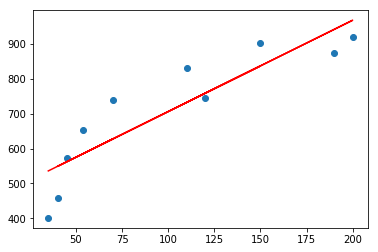

In [47]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red');

Коэффициент детерминации

In [48]:
z1 = b0 + b1 * x1

print(f'real: {y1[:5]}')
print(f'pred: {z1[:5]}')

real: [401. 574. 874. 919. 459.]
pred: [535.89621821 562.10160703 942.07974498 968.2851338  548.99891262]


In [49]:
R1 = z1.var() / y1.var()
R1

0.7876386635293678

Или как квадрат коэффициента корреляции:

In [51]:
np.corrcoef(x1, y1)[0,1] ** 2

0.7876386635293682

Средняя ошибка аппроксимации

$\overline{A} = \frac{1}{n} \displaystyle\sum_{i=1}^{n} \Bigl| {{\frac{y_i - z_i}{y_i}} \Bigr|}.$

In [0]:
def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()

In [54]:
mean_approximation_error(y1, z1)

0.11469251843561709

Несмотря на высокий коэффициент детерминации, MAE превышает 10%, и нельзя утверждать, что теоретические значения близки к тем, которые выдает модель линейной регрессии.

Оценка с помощью F-критерия Фишера.

Посчитаем статистику $T$:

$T = \dfrac{R^2}{1 - R^2} \cdot \dfrac{n - k - 1}{k}$

Где $R^2$ - коэффициент детерминации, $n$ - число наблюдений, $k$ - число факторов.

In [55]:
k = 1
n = y1.size


T1 = (R1 / (1 - R1)) * (n - k - 1 / k)
T1

29.67164085966437

Вычислим критическое значение $F_{сrit} = F(k, n-k-1)$ и сделаем оценку для Для уровня значимости  $\alpha=0.05$

In [0]:
from scipy import stats

In [58]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k, n - k - 1)
F_crit

5.317655071578714

Имеем $T > F_{crit}$, поэтому уравнение регрессии статистически значимо.

Оценка значимости получившихся параметров уравнения регрессии. Построение для них доверительных интервалов с помощью t-статистики Стьюдента.

Нам понадобится значение __стандартной ошибки коэффициента наклона__. Она вычисляется по формуле:

$$S_{slope} = \sqrt{\dfrac{\frac{1}{n - 2} \displaystyle\sum_{i=1}^{n}(y_i - z_i)^2}{\displaystyle\sum_{i=1}^n (x_i - \overline{x})^2}},$$

где:
* $x$, $x_i$ - соответственно, все значения и конкретное значение фактора
* $y_i$ - конкретное значение оцениваемой (целевой) переменной
* $z_i$ - "предсказанное" значение, полученное с помощью модели регрессии
* $n$ - число элементов в выборке

In [59]:
b1

2.620538882402765

In [0]:
def standard_error_slope(x, y, z):
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [61]:
s_slope = standard_error_slope(x1, y1, z1)
s_slope

0.48108279568516005

статистика $T = \dfrac{\hat{b}_1}{S_{slope}}$ имеет распределение Стьюдента со степенями свободы $n - 2$. Зададим уровень значимости $\alpha=0.05$. Тогда критическая область выглядит следующим образом:

$$\Omega_\alpha = \left( -\infty, - t_{1 - \alpha/2, \: n - 2} \right) \cup \left( t_{1 - \alpha/2, \: n - 2}, \infty \right).$$


In [62]:
T = b1 / s_slope
T

5.447168150485579

In [64]:
student = stats.t(n-2)
t_ = student.ppf(1-alpha/2)
t_

2.3060041350333704

Значение попало в критическую область, значит, гипотеза о равенстве нулю параметра  $b1$  отвергается.

Доверительный интервал для параметра  $b1$ :

In [65]:
(b1 - t_ * s_slope, b1 + t_ * s_slope)

(1.5111599662593718, 3.729917798546158)

Аналогично для параметра $b0$

In [70]:
b0

444.1773573243596

In [0]:
def standard_error_intercept(x, y, z):
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [67]:
s_intercept = standard_error_intercept(x1, y1, z1)
s_intercept

56.46649755068153

In [68]:
T = b0 / s_intercept
T

7.866210524668863

Значение попало в критическую область, значит, гипотеза о равенстве нулю параметра  $b0$  отвергается.

Доверительный интервал для параметра  $b0$:

In [69]:
(b0 - t_ * s_intercept, b0 + t_ * s_intercept)

(313.9653804816363, 574.3893341670829)

### Задача 2

В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица квантилей распределения Стьюдента?

#### Ответ

Если нам известны параметры распределения генеральной совокупности, то можно использовать Лапласа. В случае если параметры нам не известны используем Стьюдента.